In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import os
from tqdm import tqdm
import json
import time

In [3]:
df=pd.read_csv(r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\data.csv',dtype={'video_id': str})

In [4]:
df.head()

,gloss,video_id,xmin,ymin,xmax,ymax,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id
0,book,69241,385,37,885,720,25.0,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0
1,book,65225,190,25,489,370,25.0,-1,1,1,90,aslsignbank,train,https://aslsignbank.haskins.yale.edu/dictionar...,0
2,book,68011,262,1,652,480,25.0,-1,1,2,110,valencia-asl,train,https://www.youtube.com/watch?v=0UsjUE-TXns,0
3,book,68208,123,19,516,358,25.0,60,1,3,113,lillybauer,train,https://www.youtube.com/watch?v=1QOYOZ3g-aY,0
4,book,68012,95,0,1180,720,25.0,-1,1,4,109,valencia-asl,train,https://www.youtube.com/watch?v=aGtIHKEdCds,0


In [4]:
## size analysis

#video_data=[]
orignal_sizes=pd.DataFrame()
focus_sizes=pd.DataFrame()
path=r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\videos'
for v_path in tqdm(os.listdir(path)):
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    #video=[]
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            try:
                frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
                gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                
                orignal_sizes=orignal_sizes.append(pd.DataFrame([gray.shape]))
                focus_sizes=focus_sizes.append(pd.DataFrame([gray_focus.shape]))
                break
            except:
                print(v_path)
                break
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    #video_data.append(np.asarray(video))
    cap.release()
    cv2.destroyAllWindows()

  0%|▏                                                                              | 50/19060 [00:03<19:56, 15.89it/s]


KeyboardInterrupt: 

In [25]:
focus_sizes.describe()

,0,1
count,19058.000000,19058.000000
mean,282.758317,425.361266
std,128.146439,243.320557
min,7.000000,120.000000
25%,184.000000,240.000000
50%,259.000000,349.000000
75%,373.000000,480.000000
max,973.000000,1080.000000


In [26]:
orignal_sizes.describe()

,0,1
count,19058.000000,19058.000000
mean,455.155840,740.933571
std,255.906906,483.781210
min,120.000000,160.000000
25%,240.000000,320.000000
50%,370.000000,640.000000
75%,480.000000,720.000000
max,1080.000000,1920.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000286971AA508>,
      dtype=object)

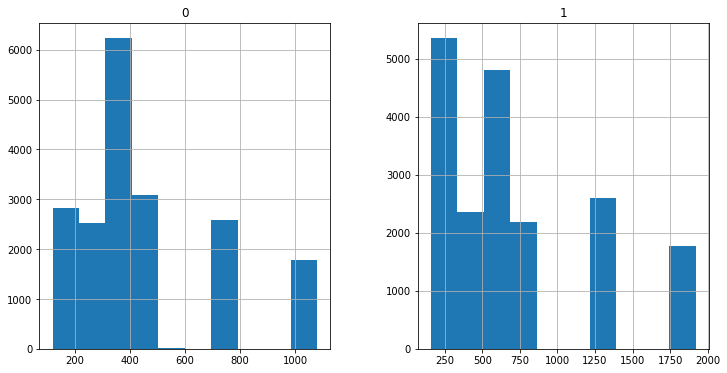

In [27]:
orignal_sizes.hist(figsize=(12,6),bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028696A890C8>,
      dtype=object)

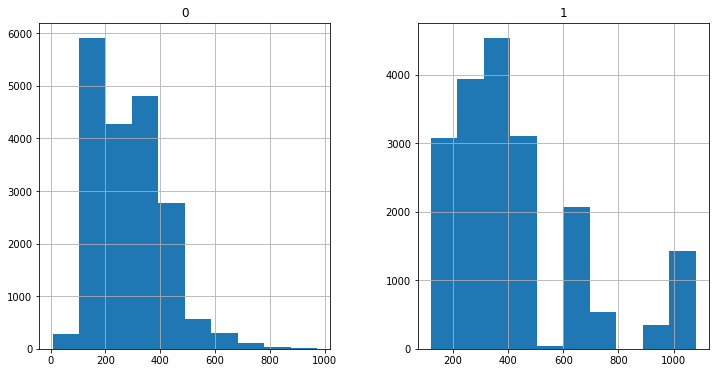

In [28]:
focus_sizes.hist(figsize=(12,6),bins=10)

In [29]:
orignal_sizes.head()

,0,1
0,320,480
0,320,480
0,240,320
0,480,640
0,240,320


In [30]:
orignal_sizes.mode()

,0,1
0,480,640


In [36]:
(orignal_sizes[0]==480).sum(),(orignal_sizes[1]==640).sum()

(2888, 3236)

In [32]:
focus_sizes.mode()

,0,1
0,320,240


In [37]:
(focus_sizes[0]==320).sum(),(focus_sizes[1]==240).sum()

(1582, 2471)

In [5]:
## checking fps

video_data=[]
video_data_focus=[]
fps=[]
path=r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\videos'
for v_path in os.listdir(path)[:30]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    fps.append(cap.get(cv2.CAP_PROP_FPS))
    video=[]
    video_focus=[]
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
            gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            video.append(gray)
            video_focus.append(gray_focus)
            
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [39]:
fps_data=pd.DataFrame()
fps_data['video_data']=video_data
fps_data['fps']=fps
fps_data['video_data_focus']=video_data_focus
   

In [6]:
## checking fps
import time
video_data=[]
video_data_focus=[]
path=r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\videos'
for v_path in os.listdir(path)[:30]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    video=[]
    video_focus=[]
    prev_time=time.time()
    flag=True
    while(cap.isOpened()):
        ret, frame = cap.read()
        new_frame_time = time.time()
        if ret==True:
            if new_frame_time-prev_time>=1/25 or flag:
                frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
                gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                video.append(gray)
                video_focus.append(gray_focus)
                cv2.imshow('gray',gray_focus)
                flag=False
                prev_time=new_frame_time
            
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()

In [50]:
fps_data['video_data_adjusted']=video_data
fps_data['video_data_focus_adjusted']=video_data_focus

In [51]:
fps_data

,video_data,fps,video_data_focus,video_data_adjusted,video_data_focus_adjusted
0,"(23, 320, 480)",25.000000,"(23, 320, 240)","(23, 320, 480)","(23, 320, 240)"
1,"(60, 320, 480)",25.000000,"(60, 320, 240)","(60, 320, 480)","(60, 320, 240)"
2,"(58, 240, 320)",25.000000,"(58, 183, 235)","(58, 240, 320)","(58, 183, 235)"
3,"(65, 480, 640)",30.004616,"(65, 377, 480)","(65, 480, 640)","(65, 377, 480)"
4,"(28, 240, 320)",29.970000,"(28, 174, 225)","(28, 240, 320)","(28, 174, 225)"
5,"(71, 192, 288)",29.970000,"(71, 124, 178)","(71, 192, 288)","(71, 124, 178)"
6,"(60, 192, 288)",29.970000,"(60, 132, 179)","(60, 192, 288)","(60, 132, 179)"
7,"(84, 400, 720)",30.331450,"(84, 210, 354)","(84, 400, 720)","(84, 210, 354)"
8,"(60, 320, 480)",25.000000,"(60, 320, 240)","(60, 320, 480)","(60, 320, 240)"
9,"(56, 240, 320)",25.000000,"(56, 179, 235)","(56, 240, 320)","(56, 179, 235)"


In [59]:
## checking fps
import time
video_data=[]
video_data_focus=[]
path=r'E:\capstone\code\WLASL-master\WLASL-master\start_kit\videos'
for v_path in os.listdir(path)[2:10]:
    det=df[df['video_id']==v_path[:5]]
    v_path=os.path.join(path, v_path)
    cap=cv2.VideoCapture(v_path)
    cap.set(cv2.CAP_PROP_FPS,25) 
    video=[]
    video_focus=[]
    prev_time=time.time()
    flag=True
    while(cap.isOpened()):
        ret, frame = cap.read()
         
        
        print(cap.get(cv2.CAP_PROP_FPS))
        
        if ret==True:
            frame_focus=frame[int(det['xmin']):int(det['xmax']),int(det['ymin']):int(det['ymax']),:]
            gray_focus = cv2.cvtColor(frame_focus, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            video.append(gray)
            video_focus.append(gray_focus)
            cv2.imshow('gray',gray_focus)
            flag=False
              
            
        else:
            break
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_data.append(np.asarray(video).shape)
    video_data_focus.append(np.asarray(video_focus).shape)
    cap.release()
    cv2.destroyAllWindows()

25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30.004616094783813
30

KeyboardInterrupt: 